## 1.1: Processing Dataset For Classification Problem.

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [207]:
raw_data = pd.read_excel("dataset1.xlsx")
raw_data.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


In [208]:
X, y = raw_data.iloc[:,1:], raw_data.iloc[:,0]  # separating out features and labels.
X.describe()

,var1,var2,var4,var5
count,925.000000,925.000000,325.000000,925.000000
mean,360.116562,548.390134,108.452308,325.393946
std,87.866662,135.221460,26.325744,78.862779
min,209.560000,139.965000,57.000000,163.000000
25%,278.640000,467.373000,87.000000,257.900000
50%,367.640000,569.841000,105.000000,342.350000
75%,437.600000,652.278000,126.000000,393.000000
max,539.920000,794.848000,180.000000,457.150000


In [209]:
len(X["var3"].unique())  # counting number of unique categories in var3.

236

In [210]:
from collections import Counter
Counter(X["var3"])  # counting item occurences in var3.

Counter({'Czech Republic': 9,
         'South Africa': 8,
         'Australia': 8,
         'Greece': 8,
         'Senegal': 8,
         'Micronesia': 7,
         'Luxembourg': 7,
         'Albania': 7,
         'Cyprus': 7,
         'France': 7,
         'Burundi': 7,
         'Turkey': 7,
         'Liberia': 7,
         'Bosnia and Herzegovina': 7,
         'Cambodia': 7,
         'Algeria': 6,
         'Mexico': 6,
         'Saint Vincent and the Grenadines': 6,
         'Eritrea': 6,
         'Belarus': 6,
         'Ethiopia': 6,
         'Taiwan': 6,
         'Singapore': 6,
         'Western Sahara': 6,
         'Mongolia': 6,
         'Gabon': 6,
         'Bahamas': 6,
         'Peru': 6,
         'Costa Rica': 6,
         'Afghanistan': 6,
         'Jersey': 6,
         'Hong Kong': 6,
         'Malta': 6,
         'Samoa': 6,
         'Moldova': 6,
         'China': 6,
         'Christmas Island': 6,
         'Zimbabwe': 6,
         'Cameroon': 5,
         'Greenland': 5,
    

In [211]:
Counter(X["var6"])  # counting item occurences in var6.

Counter({'yes': 483, 'no': 442})

In [212]:
[x for x in X["var7"] if type(x)==str]  # exploring the string values in var7.

['2019-02-29 12:31:57',
 '2019-02-29 18:06:21',
 '2019-02-29 11:00:06',
 '2019-02-29 23:56:06',
 '2019-02-29 19:26:35']

In [213]:
X.drop('var7', axis=1, inplace=True)  # removing var7.

In [214]:
X_numeric = X[['var1', 'var2', 'var4', 'var5']]
X_numeric.corr()  # none of the pairs are particularly strongly correlated.

,var1,var2,var4,var5
var1,1.000000,0.344854,-0.387306,0.519466
var2,0.344854,1.000000,-0.243858,0.328229
var4,-0.387306,-0.243858,1.000000,-0.385052
var5,0.519466,0.328229,-0.385052,1.000000


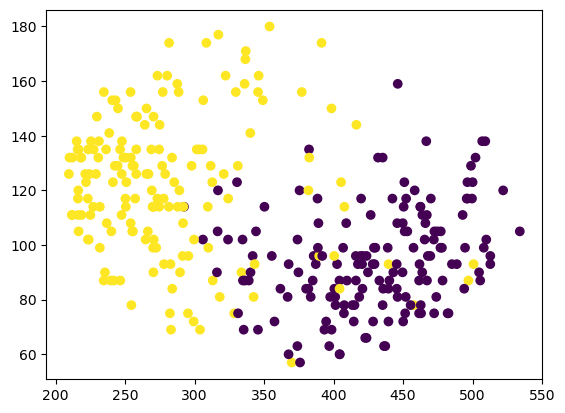

In [215]:
plt.scatter(X['var1'], X['var4'], c=y)

### Replacing var4 Missing Values

In [216]:
original_col = X['var4']  # preserving the original subset.

for index, row in X.iterrows():
    if np.isnan(row['var4']):
        random_sample = original_col.iloc[random.randrange(len(X['var4'].dropna()))]  # randomly selects a value from original subset.
        X.loc[index, 'var4'] = random_sample  # replaces the nan value with the random sample.

Text(0.5, 1.0, 'Boxplot of var4 Before Random Sample Imputation')

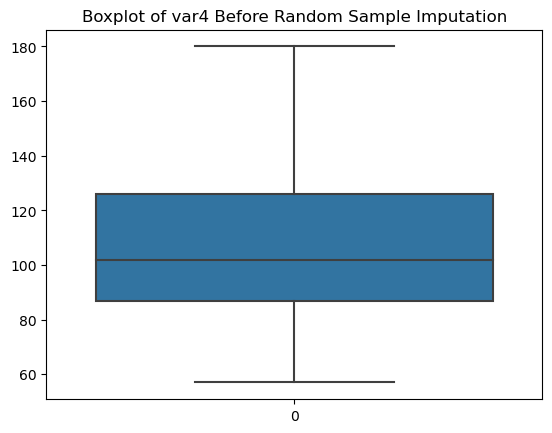

In [218]:
sns.boxplot(original_col)
plt.title('Boxplot of var4 Before Random Sample Imputation')

Text(0.5, 1.0, 'Boxplot of var4 After Random Sample Imputation')

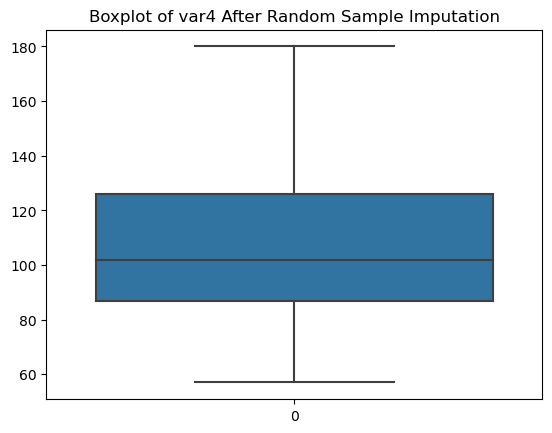

In [219]:
sns.boxplot(X['var4'])
plt.title('Boxplot of var4 After Random Sample Imputation')

In [220]:
X_numeric = X[['var1', 'var2', 'var4', 'var5']]
X_numeric.corr()  # var4 is now less correlated with other columns.

,var1,var2,var4,var5
var1,1.000000,0.344854,-0.123890,0.519466
var2,0.344854,1.000000,-0.094306,0.328229
var4,-0.123890,-0.094306,1.000000,-0.113662
var5,0.519466,0.328229,-0.113662,1.000000
